Analysis and Forecasting of GDP Using Machine Learning,for our case we are using dataset for India,
But still other datasets can be used
This project uses regression models to forecast GDP
The Data is taken from World Bank and preprocessed in Excel

# Data Loading and Cleaning

In [103]:
import numpy as np
import pandas as pd

In [107]:
gdpdata=pd.read_csv("D:/UNITS PDFs/PROJECTS/DATASETS/IndiaGDP.csv",header=None)

In [108]:
gdpdata.head

<bound method NDFrame.head of        0             1
0   1960  3.653593e+10
1   1961  3.870910e+10
2   1962  4.159907e+10
3   1963  4.777600e+10
4   1964  5.572687e+10
..   ...           ...
59  2018  2.900000e+12
60  2019  3.120000e+12
61  2020  3.100000e+12
62  2021  3.240000e+12
63  2022  3.350000e+12

[64 rows x 2 columns]>

In [109]:
# Dropping null values
gdpdata.dropna()

,0,1
0,1960,3.653593e+10
1,1961,3.870910e+10
2,1962,4.159907e+10
3,1963,4.777600e+10
4,1964,5.572687e+10
...,...,...
59,2018,2.900000e+12
60,2019,3.120000e+12
61,2020,3.100000e+12
62,2021,3.240000e+12


In [110]:
labels=['Year','GDP']

In [111]:
gdpdata.columns=labels

In [112]:
gdpdata.head()

,Year,GDP
0,1960,3.653593e+10
1,1961,3.870910e+10
2,1962,4.159907e+10
3,1963,4.777600e+10
4,1964,5.572687e+10


# Exploratory Analysis

In [113]:
gdpdata.shape

(64, 2)

In [114]:
gdpdata.ndim

2

In [115]:
gdpdata.dtypes

Year      int64
GDP     float64
dtype: object

In [116]:
gdpdata['GDP'].describe()

count    6.400000e+01
mean     7.830962e+11
std      9.819400e+11
min      3.653593e+10
25%      1.002996e+11
50%      2.925000e+11
75%      1.192500e+12
max      3.350000e+12
Name: GDP, dtype: float64

In [117]:
gdpdata.corr()

,Year,GDP
Year,1.000000,0.846656
GDP,0.846656,1.000000


<Axes: xlabel='Year'>

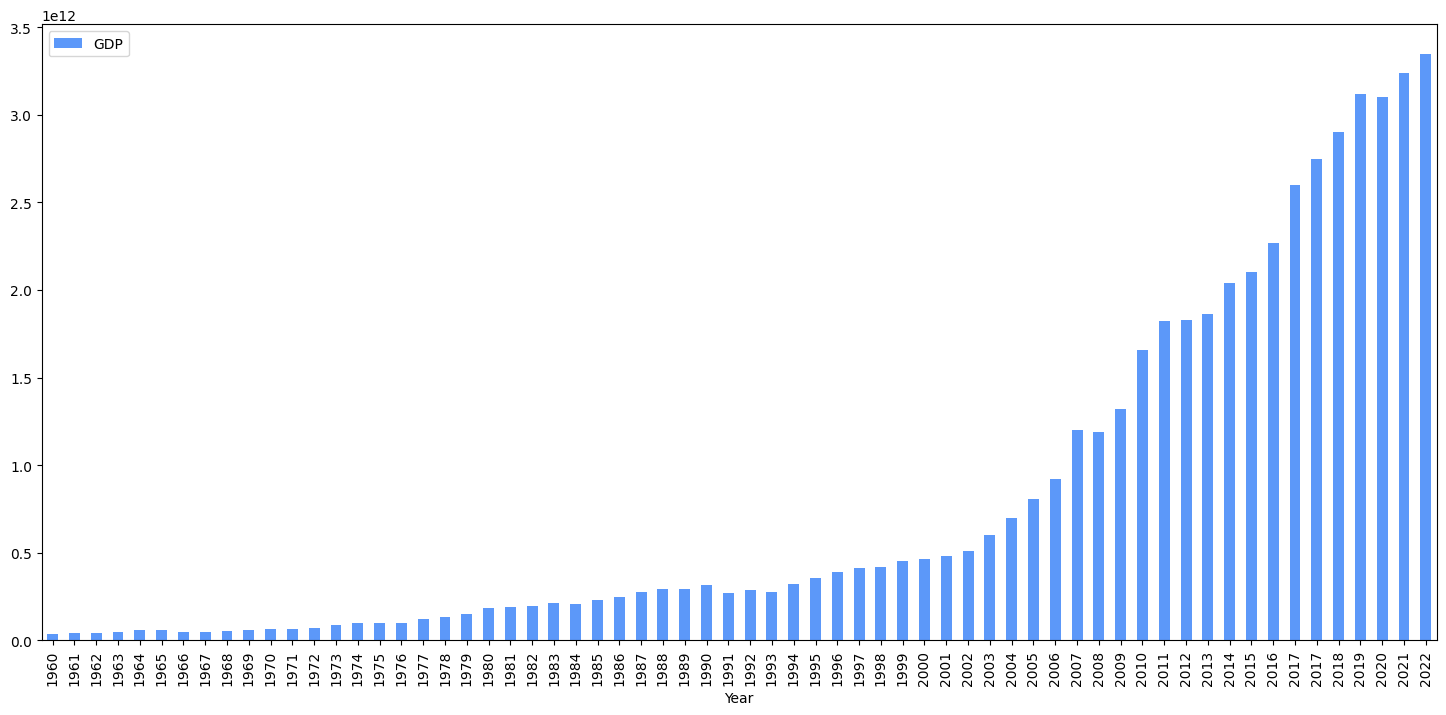

In [118]:
gdpdata.plot('Year','GDP',kind='bar',figsize=(18,8),color='#5c98f9')

<Axes: xlabel='Year'>

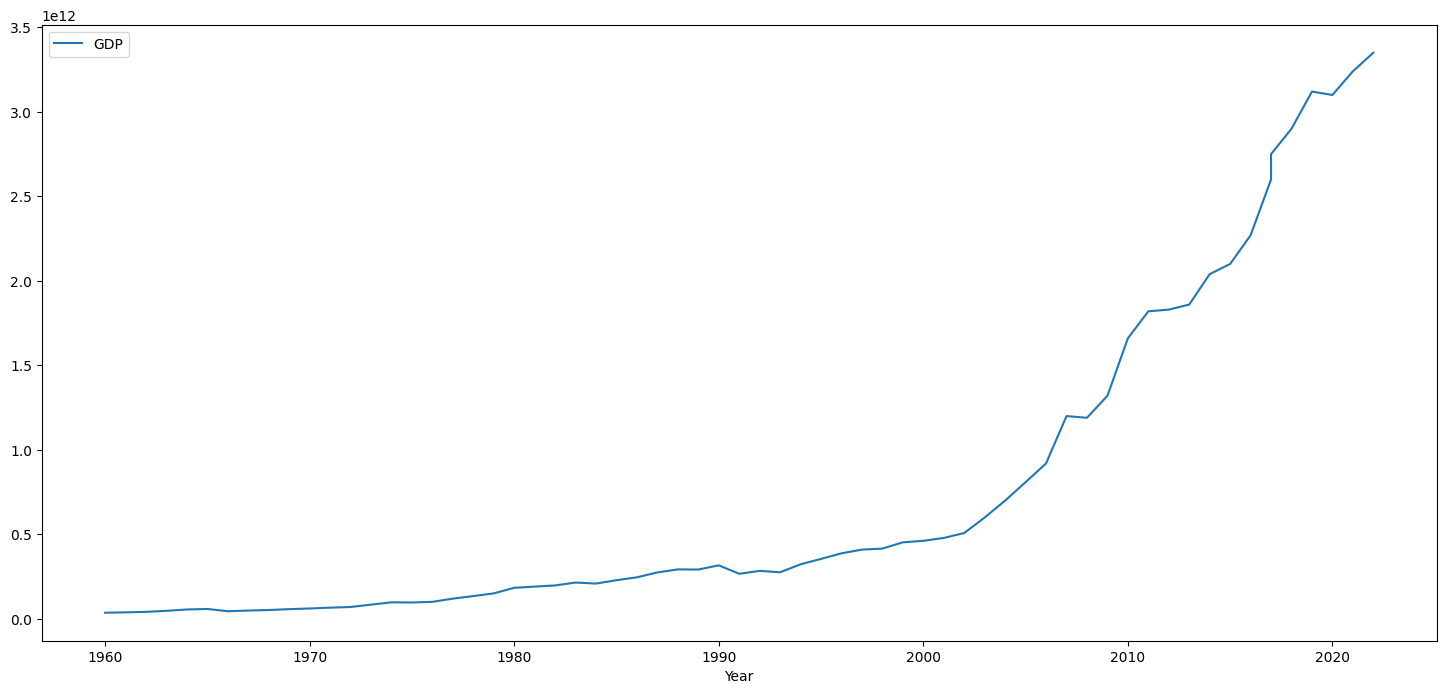

In [119]:
gdpdata.plot('Year','GDP',kind='line',figsize=(18,8))

In [120]:
import seaborn as sns

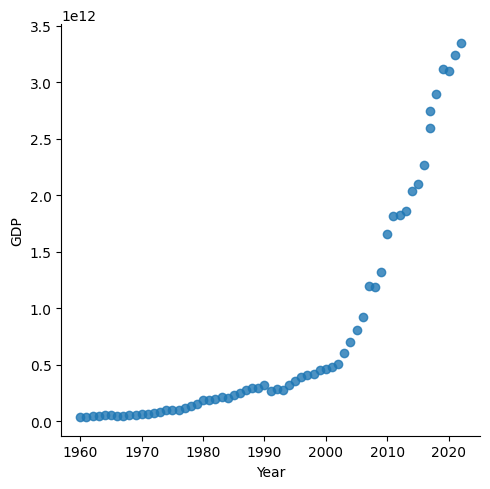

In [121]:
sns.lmplot(x='Year',y='GDP',data=gdpdata,fit_reg=False)

<Axes: xlabel='Year', ylabel='GDP'>

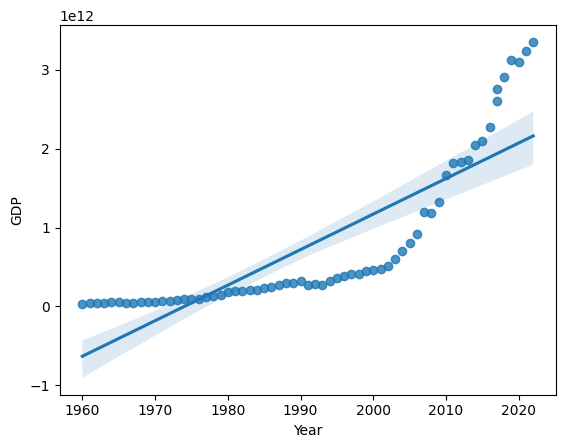

In [122]:
sns.regplot(x='Year',y='GDP',data=gdpdata)

SPLITTING THE DATA, FOR TRAINING AND TESTING

In [123]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(gdpdata)

In [124]:
X = gdpdata.iloc[:, 0:-1]
X.shape

(64, 1)

In [125]:
X.head()

,Year
0,1960
1,1961
2,1962
3,1963
4,1964


In [126]:
Y = gdpdata.iloc[:, -1]
Y.head()

0    3.653593e+10
1    3.870910e+10
2    4.159907e+10
3    4.777600e+10
4    5.572687e+10
Name: GDP, dtype: float64

In [127]:
Y.shape

(64,)

In [128]:
train

,Year,GDP
23,1983,2.150000e+11
27,1987,2.750000e+11
14,1974,9.819828e+10
12,1972,7.050991e+10
20,1980,1.840000e+11
53,2013,1.860000e+12
45,2005,8.090000e+11
62,2021,3.240000e+12
8,1968,5.237732e+10
34,1994,3.230000e+11


In [76]:
test

,Year,GDP
4,1964,5.572687e+10
59,2018,2.900000e+12
20,1980,1.840000e+11
11,1971,6.645256e+10
48,2008,1.190000e+12
35,1995,3.550000e+11
40,2000,4.620000e+11
17,1977,1.200000e+11
44,2004,7.000000e+11
24,1984,2.090000e+11


In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

FEATURE SCALING

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MODEL CREATION
1. Linear Regression
2. Decision Tree Regression
3. Lasso Regression
4. Ridge Regression
5. Random Forest

In [79]:
#:Linear Regression
from sklearn.linear_model import LinearRegression
linear_regression_model=LinearRegression().fit(train.iloc[:, :1], train.iloc[:, 1:])

In [80]:
ycap=linear_regression_model.predict(test.iloc[:, :1])
from sklearn.metrics import mean_squared_error, r2_score
error=mean_squared_error(test.iloc[:,:1],ycap)
error

9.583524927088018e+23

In [83]:
# calculating Linear Regression model accuracy
linear_regression_model.score(X_test, Y_test)

C:\Users\HR\anaconda3\envs\India-s-GDP-Predictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-7875.102573434884

In [84]:
import matplotlib.pyplot as plt

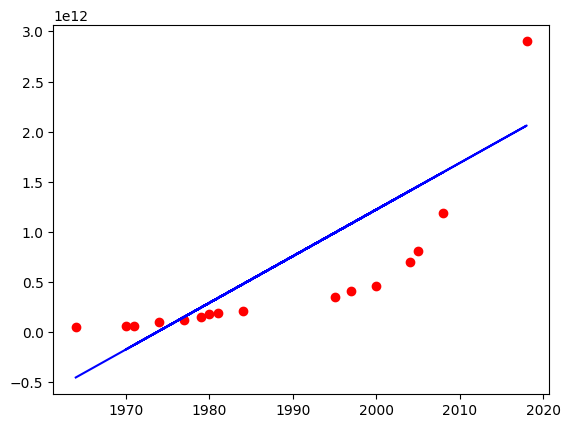

In [85]:
plt.plot(test['Year'],test['GDP'],'ro')
plt.plot(test['Year'],ycap,'b-')
plt.show()

In [86]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
decisiontree_regression_model=DecisionTreeRegressor().fit(train.iloc[:, :1], train.iloc[:, 1:])

In [87]:
ycap2=decisiontree_regression_model.predict(test.iloc[:, :1])
error=mean_squared_error(test.iloc[:,:1],ycap2)
error

6.507428664482297e+23

In [88]:
# calculating Decision Tree Regression model accuracy
decisiontree_regression_model.score(X_test, Y_test)

C:\Users\HR\anaconda3\envs\India-s-GDP-Predictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


-0.5939302885915869

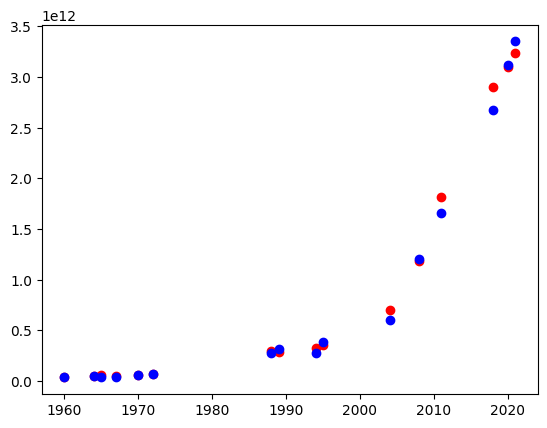

In [36]:
plt.plot(test['Year'],test['GDP'],'ro')
plt.plot(test['Year'],ycap2,'bo')
plt.show()

In [37]:
#Lasso Regression 
from sklearn.linear_model import Lasso
lasso_regression_model=Lasso(alpha=10).fit(train.iloc[:, :1], train.iloc[:, 1:])

In [38]:
ycap3=lasso_regression_model.predict(test.iloc[:, :1])
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test.iloc[:,:1],ycap3)
error

1.3352295183905986e+24

In [39]:
# calculating Lasso Regression model accuracy
lasso_regression_model.score(X_test, Y_test)

C:\Users\HR\anaconda3\envs\India-s-GDP-Predictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


-8818.62342836054

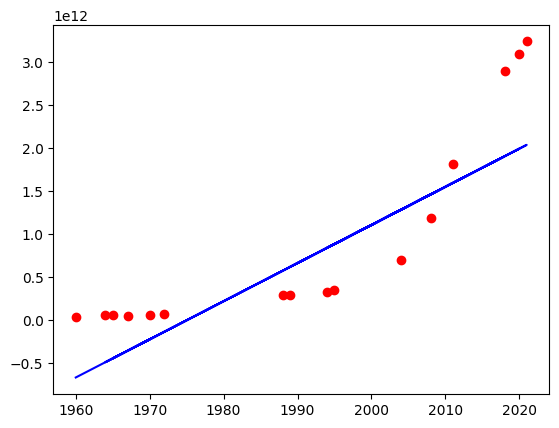

In [40]:
plt.plot(test['Year'],test['GDP'],'ro')
plt.plot(test['Year'],ycap3,'b-')
plt.show()

In [41]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_regression_model=Ridge(alpha=1).fit(train.iloc[:, :1], train.iloc[:, 1:])

In [42]:
ycap4=ridge_regression_model.predict(test.iloc[:, :1])
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test.iloc[:,:1],ycap4)
error

1.335113855524174e+24

In [43]:
# calculating Ridge Regression model accuracy
ridge_regression_model.score(X_test, Y_test)

C:\Users\HR\anaconda3\envs\India-s-GDP-Predictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


-8817.396478117591

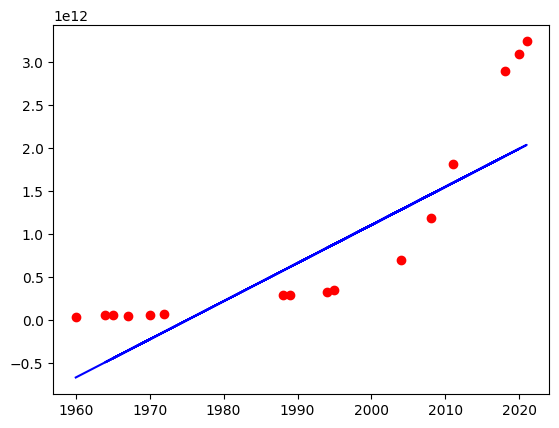

In [44]:
plt.plot(test['Year'],test['GDP'],'ro')
plt.plot(test['Year'],ycap4,'b-')
plt.show()

In [45]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model=RandomForestRegressor().fit(train.iloc[:, :1], train.iloc[:, 1:])

C:\Users\HR\AppData\Local\Temp\ipykernel_16248\3447071797.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model=RandomForestRegressor().fit(train.iloc[:, :1], train.iloc[:, 1:])


In [46]:
ycap5=random_forest_model.predict(test.iloc[:, :1])
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test.iloc[:,:1],ycap5)
error

2.0125804141053683e+24

In [47]:
# calculating Random forest regressor model accuracy
random_forest_model.score(X_test, Y_test)

C:\Users\HR\anaconda3\envs\India-s-GDP-Predictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


-0.5790875305871859

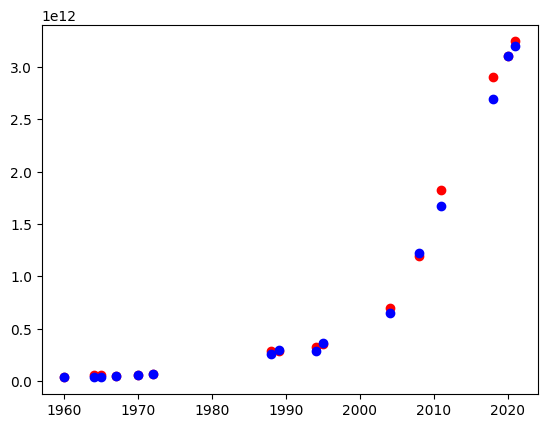

In [48]:
plt.plot(test['Year'],test['GDP'],'ro')
plt.plot(test['Year'],ycap5,'bo')
plt.show()

The Problem with Decision Trees and Random Forests is they cannot be used for out of range Data

In [49]:
decisiontree_regression_model.predict([[2070]])

C:\Users\HR\anaconda3\envs\India-s-GDP-Predictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([3.35e+12])

In [50]:
import joblib
joblib.dump(decisiontree_regression_model, 'GDP_Model.sav')

['GDP_Model.sav']

In [51]:
impmodel=joblib.load('GDP_Model.sav')

SUMMARY OF MODELS' PERFORMANCE

In [52]:
decisiontree_regression_model.score(X_test, Y_test)

C:\Users\HR\anaconda3\envs\India-s-GDP-Predictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\HR\anaconda3\envs\India-s-GDP-Predictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\HR\anaconda3\envs\India-s-GDP-Predictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\HR\anaconda3\envs\India-s-GDP-Predictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\HR\anaconda3\envs\India-s-GDP-Predictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names

-8818.62342836054

In [ ]:
random_forest_model.score(X_test, Y_test)

In [ ]:
linear_regression_model.score(X_test, Y_test)

In [ ]:
ridge_regression_model.score(X_test, Y_test)

In [ ]:
lasso_regression_model.score(X_test, Y_test)